# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [595]:
m=1
p = 0.1#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [596]:
global compactified=false
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [597]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [598]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [599]:
print(N)

400.0

In [600]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [645]:
using Printf
include("./TMYangMills.jl");

In [646]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.005
the time step is 0.001


# Initial data of m β Ψ and Ψ,x

In [647]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initpi=zeros(L)
initderxchi=zeros(L)
initderpsi=zeros(L)
initxchi=zeros(L)

#state array is m beta psi xchi,u xchi,rORx psi,r xchi r
state_array=[initm initbeta initpsi initpi initderxchi initderpsi initxchi initX];
#attention:  in noncompactified code derxchi is (xchi),r. in compactified code derxchi is (xchi),x


#PSI,R
A=0.075*p*(1−q)
r0=0.75
sigma=0.25

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#XCHI
A=0.25*p*q
r0=0.3
sigma=0.1

initxchi[4:L-3] = init_xchi(initX1,r0,sigma,A)

state_array[:,7] = initxchi

####
#PSI FROM PSI,R, CHI,R FROM CHI
#state_array[:,7]=parity(state_array[:,7])
state_array[4:L-3,5]=Der_arrayLOP(state_array,7,initX)[4:L-3]#derivative(xchi_func, initX1; nu=1)#Der_array(state_array,7,initX)[4:L-3]
#state_array[L-3,5]=state_array[L-4,5]

#state_array[:,5]=secondparity(state_array[:,5])
aux=Der_array(state_array,5,initX)
#aux[4]=0
#aux[L-3]=aux[L-4]

# update interpolation of psi,x
derxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,5],  k=4);
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);
xchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);
derrxchi_func = Spline1D(initX[4:L-3], aux[4:L-3], k=4);

funcs=[derxchi_func derpsi_func xchi_func derrxchi_func];

In [648]:
y0=[0.0 0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:4] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:4] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

401×4 Matrix{Float64}:
 0.0  0.0  0.0   0.0
 0.0  0.0  0.0   2.17951e-7
 0.0  0.0  0.0   1.22457e-6
 0.0  0.0  0.0   3.26655e-6
 0.0  0.0  0.0   6.32792e-6
 0.0  0.0  0.0   1.06238e-5
 0.0  0.0  0.0   1.64412e-5
 0.0  0.0  0.0   2.41426e-5
 0.0  0.0  0.0   3.41706e-5
 0.0  0.0  0.0   4.70534e-5
 0.0  0.0  0.0   6.34102e-5
 0.0  0.0  0.0   8.39572e-5
 0.0  0.0  0.0   0.000109512
 ⋮              
 0.0  0.0  0.0  -3.7302e-6
 0.0  0.0  0.0  -3.72384e-6
 0.0  0.0  0.0  -3.71776e-6
 0.0  0.0  0.0  -3.71194e-6
 0.0  0.0  0.0  -3.70636e-6
 0.0  0.0  0.0  -3.70103e-6
 0.0  0.0  0.0  -3.69592e-6
 0.0  0.0  0.0  -3.69103e-6
 0.0  0.0  0.0  -3.68635e-6
 0.0  0.0  0.0  -3.68187e-6
 0.0  0.0  0.0  -3.68144e-6
 0.0  0.0  0.0  -3.65405e-6

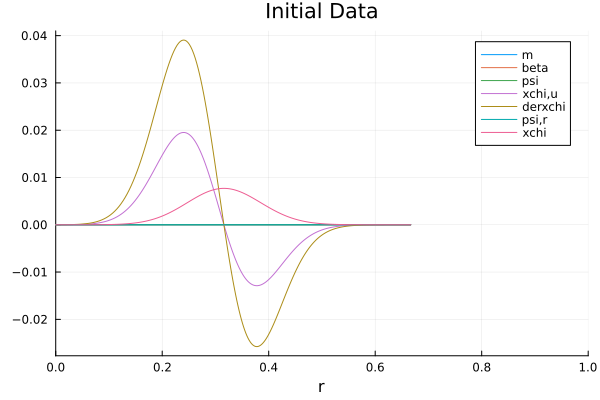

In [649]:
using Plots #showing initial data and the initial status of the horizon finder
plot(compactify.(initX[4:L-3]), state_array[4:L-3,1:7], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xchi,u" "derxchi" "psi,r" "xchi"],xlim=[0,1])

In [650]:
state_array

407×8 Matrix{Float64}:
 0.0  0.0  0.0   0.0          0.0          0.0  0.0         -0.015
 0.0  0.0  0.0   0.0          0.0          0.0  0.0         -0.01
 0.0  0.0  0.0   0.0          0.0          0.0  0.0         -0.005
 0.0  0.0  0.0   0.0          6.46727e-6   0.0  0.0          0.0
 0.0  0.0  0.0   2.17951e-7   7.14907e-6   0.0  3.19976e-8   0.005
 0.0  0.0  0.0   1.22457e-6   9.46549e-6   0.0  7.14907e-8   0.01
 0.0  0.0  0.0   3.26655e-6   1.35241e-5   0.0  1.26652e-7   0.015
 0.0  0.0  0.0   6.32792e-6   1.96112e-5   0.0  2.06731e-7   0.02
 0.0  0.0  0.0   1.06238e-5   2.81555e-5   0.0  3.22764e-7   0.025
 0.0  0.0  0.0   1.64412e-5   3.97303e-5   0.0  4.88286e-7   0.03
 0.0  0.0  0.0   2.41426e-5   5.50598e-5   0.0  7.20067e-7   0.035
 0.0  0.0  0.0   3.41706e-5   7.50284e-5   0.0  1.03888e-6   0.04
 0.0  0.0  0.0   4.70534e-5   0.000100691  0.0  1.47035e-6   0.045
 ⋮                                         ⋮                
 0.0  0.0  0.0  -3.71194e-6  -2.69755e-7   0.0  3.33

In [651]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [652]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "deruxchi", "derxchi", "derpsi", "xchi", "massloss"]


massloss = zeros(L)
massloss[4:L-3] = masslossfunc(state_array)[4:L-3]
print_muninn(files, 0, [state_array[:,1:7] massloss],res,"w", state_array[:,8])

In [653]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [654]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

4.999999999999999


In [655]:
using Base.Threads
Threads.nthreads()

4

In [656]:
dt=0.001/2^(m-1)

0.001

 ## Time evolution

In [657]:
state_array

407×8 Matrix{Float64}:
 0.0  0.0  0.0   0.0          0.0          0.0  0.0         -0.015
 0.0  0.0  0.0   0.0          0.0          0.0  0.0         -0.01
 0.0  0.0  0.0   0.0          0.0          0.0  0.0         -0.005
 0.0  0.0  0.0   0.0          6.46727e-6   0.0  0.0          0.0
 0.0  0.0  0.0   2.17951e-7   7.14907e-6   0.0  3.19976e-8   0.005
 0.0  0.0  0.0   1.22457e-6   9.46549e-6   0.0  7.14907e-8   0.01
 0.0  0.0  0.0   3.26655e-6   1.35241e-5   0.0  1.26652e-7   0.015
 0.0  0.0  0.0   6.32792e-6   1.96112e-5   0.0  2.06731e-7   0.02
 0.0  0.0  0.0   1.06238e-5   2.81555e-5   0.0  3.22764e-7   0.025
 0.0  0.0  0.0   1.64412e-5   3.97303e-5   0.0  4.88286e-7   0.03
 0.0  0.0  0.0   2.41426e-5   5.50598e-5   0.0  7.20067e-7   0.035
 0.0  0.0  0.0   3.41706e-5   7.50284e-5   0.0  1.03888e-6   0.04
 0.0  0.0  0.0   4.70534e-5   0.000100691  0.0  1.47035e-6   0.045
 ⋮                                         ⋮                
 0.0  0.0  0.0  -3.71194e-6  -2.69755e-7   0.0  3.33

fixed grid

In [658]:
finaltime=3
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.001, t=0.10000000000000007 speed is 0.5000000000000001, dx/dt=5.0


iteration 200 dt is 0.001, t=0.20000000000000015 speed is 0.5000000000000001, dx/dt=5.0


iteration 300 dt is 0.001, t=0.3000000000000002 speed is 0.5000000000000001, dx/dt=5.0


iteration 400 dt is 0.001, t=0.4000000000000003 speed is 0.5000000000000001, dx/dt=5.0


iteration 500 dt is 0.001, t=0.5000000000000003 speed is 0.5000000000000001, dx/dt=5.0


iteration 600 dt is 0.001, t=0.6000000000000004 speed is 0.5000000000000001, dx/dt=5.0


iteration 700 dt is 0.001, t=0.7000000000000005 speed is 0.5000000000000001, dx/dt=5.0


iteration 800 dt is 0.001, t=0.8000000000000006 speed is 0.5000000000000001, dx/dt=5.0


iteration 900 dt is 0.001, t=0.9000000000000007 speed is 0.5000000000000001, dx/dt=5.0


iteration 1000 dt is 0.001, t=1.0000000000000007 speed is 0.5000000000000001, dx/dt=5.0


iteration 1100 dt is 0.001, t=1.0999999999999897 speed is 0.5000000000000001, dx/dt=5.0


iteration 1200 